In [1]:
# Regular EDA(exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
%matplotlib inline

from tqdm import tqdm
import string
import statistics
import re
import joblib
import random
import statistics
from collections import Counter
from scipy import stats
import os

# import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics.pairwise import cosine_similarity
import zipfile
from wordcloud import WordCloud
from matplotlib.lines import Line2D

In [2]:
# Import the Data
mir_link_id = pd.read_csv('/kaggle/input/media-study/mir_afsar_ali_yt_links - Sheet1.csv')


def extract_video_id(url):
    # Regular expression pattern to match YouTube video IDs
    pattern = r'(?:youtube\.com\/(?:[^\/\n\s]+\/\S+\/|(?:v|e(?:mbed)?)\/|\S*?[?&]v=)|youtu\.be\/)([a-zA-Z0-9_-]{11})'

    # Search for the video ID in the URL
    match = re.search(pattern, url)

    if match:
        return match.group(1)  # Return the matched video ID
    else:
        return None  # Return None if no match found

# Example URLs
urls = mir_link_id['yt_link']

video_ids = [extract_video_id(url) for url in urls]
mir_link_id['video_id'] = video_ids

print(mir_link_id.category.value_counts())


mirer_thek_vids = mir_link_id[mir_link_id['category'] == 'mirerthek']['video_id'].tolist()
mir_soho_vids = mir_link_id[mir_link_id['category'] == 'mir soho']['video_id'].tolist()
mir_chara_vids = mir_link_id[mir_link_id['category'] == 'mir chara']['video_id'].tolist()

print(f'{len(mirer_thek_vids)} {len(mir_soho_vids)} {len(mir_chara_vids)}')

category
mir soho     304
mir chara    168
mirerthek     62
Name: count, dtype: int64
62 304 168


In [3]:
print(len(set(mir_soho_vids)))

202


In [4]:
dfc = pd.read_csv('/kaggle/input/media-study2-0/final_video_info/mir_chara_vif.csv')
dfs = pd.read_csv('/kaggle/input/media-study2-0/final_video_info/mir_soho_vif.csv')
dft = pd.read_csv('/kaggle/input/media-study2-0/final_video_info/mirer_thek_vif.csv')

print(f'{dfc.shape} {dfs.shape} {dft.shape}')

(246, 9) (180, 9) (70, 9)


## Mir Chara Sunday Suspense

In [29]:
mc_com = pd.read_parquet('/kaggle/input/media-study2-0/final_comment_data/mir_chara_comment.parquet')
mc_chat = pd.read_csv('/kaggle/input/media-study2-0/all_live_chat/mir_chara_live_chat.csv')

ms_com = pd.read_parquet('/kaggle/input/media-study2-0/final_comment_data/mir_soho_comment.parquet')
ms_chat = pd.read_csv('/kaggle/input/media-study2-0/all_live_chat/mir_shoho_live_chat.csv')

mt_com = pd.read_csv('/kaggle/input/media-study2-0/final_comment_data/mirer_thek_comment.csv')
mt_chat = pd.read_csv('/kaggle/input/media-study2-0/all_live_chat/mirer_thek_live_chat.csv')

print(f'Length of Mir Chara Comments is {mc_com.shape}')
print(f'Length of Mir Chara live chat is {mc_chat.shape}')

print('Total Videos Scraped', mc_com['video_id'].nunique())

mc_com.head(3)

Length of Mir Chara Comments is (201633, 6)
Length of Mir Chara live chat is (343125, 4)
Total Videos Scraped 245


,author,published_date,published_time,like_count,text,video_id
0,@skmdimran852,2024-05-21,03:45:59Z,0,❤❤❤,SgqeN_FUprg
1,@tanvirhaquekhan6061,2024-05-20,14:25:10Z,0,সত্যজিত রায়ের মতো এমন দূরদর্শী মানুষ হাজার বছর...,SgqeN_FUprg
2,@MohammadArman-ob1id,2024-05-20,12:12:24Z,0,Mitryur porer abostha toh bollen na keno ami j...,SgqeN_FUprg


In [6]:
mc_chat.head(3)

,datetime,author,message,vid_id
0,2024-05-05 07:28:34,Paglamo Sudupaglamo,joy east bengal :red_square::yellow_square::re...,SgqeN_FUprg
1,2024-05-05 07:28:34,Soumen banarjee🙂,hi,SgqeN_FUprg
2,2024-05-05 07:28:37,Paglamo Sudupaglamo,joy east bengal :red_square::yellow_square::re...,SgqeN_FUprg


In [30]:
mc_com.drop(columns = ['published_time', 'video_id'], inplace=True)
ms_com.drop(columns = ['published_time', 'video_id'], inplace=True)
mt_com.drop(columns = ['published_time', 'video_id'], inplace=True)

mc_com.head(3)

,author,published_date,like_count,text
0,@skmdimran852,2024-05-21,0,❤❤❤
1,@tanvirhaquekhan6061,2024-05-20,0,সত্যজিত রায়ের মতো এমন দূরদর্শী মানুষ হাজার বছর...
2,@MohammadArman-ob1id,2024-05-20,0,Mitryur porer abostha toh bollen na keno ami j...


In [31]:
# Assuming df is your DataFrame
mc_com['text'] = mc_com['text'].astype(str)
ms_com['text'] = ms_com['text'].astype(str)
mt_com['text'] = mt_com['text'].astype(str)
mc_chat['message'] = mc_chat['message'].astype(str)

In [32]:
import langid

def detect_language(text):
    x = langid.classify(text)[0]
    if  x == 'bn':
        return 'bangla'
    elif x == 'en':
        return 'english'
    else:
        return 'banglish'


In [33]:
print(mt_com['text'][0])
detect_language(mt_com['text'][0])

Thanks Mr.mir


'english'

In [34]:
import langid
def clean_emoji(text):
    cleaned_text = re.sub('[^a-zA-z0-9\u0980-\u09FF,./!?$%&"\'\\-_;:।]'," ",text)
    return cleaned_text

tqdm.pandas()
ms_com['ctext'] = ms_com.text.progress_apply(clean_emoji)
mc_com['ctext'] = mc_com.text.progress_apply(clean_emoji)
mt_com['ctext'] = mt_com.text.progress_apply(clean_emoji)

100%|██████████| 99687/99687 [00:00<00:00, 110218.20it/s]


In [35]:
def detect_whitespace(text):
    return re.match(r'^\s*$', text) is not None

ms_com['language'] = ''
mc_com['language'] = ''
mt_com['language'] = ''


mt_com.head()

,author,published_date,like_count,text,public,ctext,language
0,@anwarulkabir6319,2024-05-16,0,Thanks Mr.mir,True,Thanks Mr.mir,
1,@JayitaKundu-fy3hp,2024-05-11,0,বিভূতিভূষণ বন্দ্যোপাধ্যায় এর আদৰ্শ হিন্দু হোটে...,True,বিভূতিভূষণ বন্দ্যোপাধ্যায় এর আদৰ্শ হিন্দু হোটে...,
2,@subi4098,2024-05-04,0,.vison boro fan tomar ami..mirchi te tomar gol...,True,.vison boro fan tomar ami..mirchi te tomar gol...,
3,@samhotibanerjee95,2024-05-03,0,এতো স্ট্রোরি টেলার আছে yt channel এ কিন্তু মীর...,True,এতো স্ট্রোরি টেলার আছে yt channel এ কিন্তু মীর...,
4,@malabikasengupta9803,2024-04-29,0,Khub bhalo laglo Mir.\nMone hochilo golper mod...,True,Khub bhalo laglo Mir. Mone hochilo golper modh...,


In [36]:
mc_com.isna().sum()

author            0
published_date    0
like_count        0
text              0
ctext             0
language          0
dtype: int64

### Adding Language in Mirer thek

In [14]:
for ind in tqdm(mt_com.index):
    if detect_whitespace(mt_com['ctext'][ind]) == False:
        try:
            lang=langid.classify(mt_com['ctext'][ind])
        except:
            lang[0]='no'
        if lang[0] == "en":
            mt_com.loc[ind,'language'] = "English"
        elif lang[0] == "bn":
            mt_com.loc[ind,'language'] = "Bengali"
        elif lang[0] == "no":
            mt_com.loc[ind,'language'] = "Unidentified"
        else:
            mt_com.loc[ind,'language'] = "Banglish"
    elif detect_whitespace(mt_com['ctext'][ind]) == True:
        mt_com.loc[ind,'language'] = "Emoji"

100%|██████████| 99687/99687 [03:20<00:00, 496.69it/s]


In [15]:
mt_com.head(3)

,author,published_date,like_count,text,public,ctext,language
0,@anwarulkabir6319,2024-05-16,0,Thanks Mr.mir,True,Thanks Mr.mir,English
1,@JayitaKundu-fy3hp,2024-05-11,0,বিভূতিভূষণ বন্দ্যোপাধ্যায় এর আদৰ্শ হিন্দু হোটে...,True,বিভূতিভূষণ বন্দ্যোপাধ্যায় এর আদৰ্শ হিন্দু হোটে...,Bengali
2,@subi4098,2024-05-04,0,.vison boro fan tomar ami..mirchi te tomar gol...,True,.vison boro fan tomar ami..mirchi te tomar gol...,Banglish


In [16]:
mt_com.language.value_counts()

language
Bengali         41638
Banglish        26659
English         23875
Emoji            6659
Unidentified      856
Name: count, dtype: int64

In [17]:
filt = mt_com[mt_com['language']=='Emoji']
filt

,author,published_date,like_count,text,public,ctext,language
52,@anupanda6922,2023-12-03,0,🙏❤,True,,Emoji
93,@pulakdebnath4507,2023-09-03,0,❤,True,,Emoji
166,@avijit9857,2023-06-02,0,💖💖💖,True,,Emoji
172,@soumikmondal1741,2023-05-23,0,❤❤❤,True,,Emoji
182,@swagatabanerjee4217,2023-05-18,0,❤,True,,Emoji
...,...,...,...,...,...,...,...
99609,@realmir,2024-05-11,1,❤❤❤❤❤❤❤❤❤,True,,Emoji
99631,@Siyamislam420,2024-05-11,0,❤❤❤❤,True,,Emoji
99640,@SutapaTamili-bb3cw,2024-05-11,0,❤❤❤❤❤❤,True,,Emoji
99645,@mousumighosh5676,2024-05-11,0,❤❤❤❤❤❤❤❤❤❤❤,True,,Emoji


In [18]:
filt.isna().sum()

author            0
published_date    0
like_count        0
text              0
public            0
ctext             0
language          0
dtype: int64

In [19]:
mt_com.dropna(inplace=True)
mt_com.isna().sum()

author            0
published_date    0
like_count        0
text              0
public            0
ctext             0
language          0
dtype: int64

In [20]:
# mt_com.to_parquet('/kaggle/working/mirer_thek_comment.parquet', index=False)

### Adding Language in Mir chara

In [21]:
for ind in tqdm(mc_com.index):
    if detect_whitespace(mc_com['ctext'][ind]) == False:
        try:
            lang=langid.classify(mc_com['ctext'][ind])
        except:
            lang[0]='no'
        if lang[0] == "en":
            mc_com.loc[ind,'language'] = "English"
        elif lang[0] == "bn":
            mc_com.loc[ind,'language'] = "Bengali"
        elif lang[0] == "no":
            mc_com.loc[ind,'language'] = "Unidentified"
        else:
            mc_com.loc[ind,'language'] = "Banglish"
    elif detect_whitespace(mc_com['ctext'][ind]) == True:
        mc_com.loc[ind,'language'] = "Emoji"

100%|██████████| 201633/201633 [06:56<00:00, 483.63it/s]


In [22]:
mc_com.head(3)

,author,published_date,like_count,text,ctext,language
0,@skmdimran852,2024-05-21,0,❤❤❤,,Emoji
1,@tanvirhaquekhan6061,2024-05-20,0,সত্যজিত রায়ের মতো এমন দূরদর্শী মানুষ হাজার বছর...,সত্যজিত রায়ের মতো এমন দূরদর্শী মানুষ হাজার বছর...,Bengali
2,@MohammadArman-ob1id,2024-05-20,0,Mitryur porer abostha toh bollen na keno ami j...,Mitryur porer abostha toh bollen na keno ami j...,Banglish


In [23]:
mc_com.language.value_counts()

language
Banglish        65839
Bengali         65227
English         59780
Emoji            8887
Unidentified     1900
Name: count, dtype: int64

In [24]:
# mt_com.dropna(inplace=True)
mc_com.isna().sum()

author            0
published_date    0
like_count        0
text              0
ctext             0
language          0
dtype: int64

In [25]:
# mc_com.to_parquet('/kaggle/working/mir_chara_comment.parquet', index=False)

### Adding Language in Mir Shoho

In [38]:
for ind in tqdm(ms_com.index):
    if detect_whitespace(ms_com['ctext'][ind]) == False:
        try:
            lang=langid.classify(ms_com['ctext'][ind])
        except:
            lang[0]='no'
        if lang[0] == "en":
            ms_com.loc[ind,'language'] = "English"
        elif lang[0] == "bn":
            ms_com.loc[ind,'language'] = "Bengali"
        elif lang[0] == "no":
            ms_com.loc[ind,'language'] = "Unidentified"
        else:
            ms_com.loc[ind,'language'] = "Banglish"
    elif detect_whitespace(ms_com['ctext'][ind]) == True:
        ms_com.loc[ind,'language'] = "Emoji"

100%|██████████| 445398/445398 [15:12<00:00, 487.91it/s]


In [39]:
ms_com.head(3)

,author,published_date,like_count,text,ctext,language
0,@Storysuspensecomedy123,2023-01-25,1,Mirda তুমি আমাকে তৈরি করে নাও। আমার জীবন ও ভবি...,Mirda তুমি আমাকে তৈরি করে নাও। আমার জীবন ও ভবি...,Bengali
1,@kumkumdas9131,2023-01-25,0,তারানাথ তান্ত্রিকের অপেক্ষায় থাকলাম মীর দা,তারানাথ তান্ত্রিকের অপেক্ষায় থাকলাম মীর দা,Bengali
2,@golamrabbani8765,2023-01-25,0,আপনার কন্ঠে শার্লক হোমস আবারও শুনতে চাই❤️❤️❤️,আপনার কন্ঠে শার্লক হোমস আবারও শুনতে চাই,Bengali


In [40]:
ms_com.isna().sum()

author            0
published_date    0
like_count        0
text              0
ctext             0
language          0
dtype: int64

In [41]:
ms_com.language.value_counts()

language
English         158403
Banglish        138414
Bengali         125971
Emoji            18178
Unidentified      4432
Name: count, dtype: int64

In [46]:
# ms_com.to_parquet('/kaggle/working/mir_shoho_comment.parquet', index=False)

In [48]:
df = pd.read_parquet('/kaggle/working/mir_shoho_comment.parquet')
df.shape

(445398, 6)

## Reload them all

In [38]:
df1 = pd.read_parquet('/kaggle/working/mir_shoho_comment.parquet')
df2 = pd.read_parquet('/kaggle/working/mir_chara_comment.parquet')
df3 = pd.read_parquet('/kaggle/working/mirer_thek_comment.parquet')

In [39]:
print(df1.shape, df2.shape, df3.shape)

(445398, 6) (201633, 6) (99686, 7)


In [40]:
df1.head(3)

,author,published_date,like_count,text,ctext,language
0,@Storysuspensecomedy123,2023-01-25,1,Mirda তুমি আমাকে তৈরি করে নাও। আমার জীবন ও ভবি...,Mirda তুমি আমাকে তৈরি করে নাও। আমার জীবন ও ভবি...,Bengali
1,@kumkumdas9131,2023-01-25,0,তারানাথ তান্ত্রিকের অপেক্ষায় থাকলাম মীর দা,তারানাথ তান্ত্রিকের অপেক্ষায় থাকলাম মীর দা,Bengali
2,@golamrabbani8765,2023-01-25,0,আপনার কন্ঠে শার্লক হোমস আবারও শুনতে চাই❤️❤️❤️,আপনার কন্ঠে শার্লক হোমস আবারও শুনতে চাই,Bengali


In [41]:
filt = df1[df1['language'] == 'Emoji']
filt

,author,published_date,like_count,text,ctext,language
9,@rajarshikoner3528,2023-01-25,0,❤❤❤❤,,Emoji
34,@joymondal1013,2023-01-25,0,❤️❤️❤️❤️,,Emoji
42,@souvikmodak7194,2023-01-25,0,❤️🌻,,Emoji
74,@saptarshinarayanbiswas7081,2023-01-25,0,💖💖💖,,Emoji
137,@panoromaok2261,2023-01-25,0,👍👍👍👍👍👍,,Emoji
...,...,...,...,...,...,...
445335,@dabbing_abhi9490,2023-01-25,0,😊🫶,,Emoji
445346,@mandalriju026,2019-01-04,1,👍👍,,Emoji
445366,@souravbhowmick9518,2020-12-10,0,☺️,,Emoji
445390,@subratamaity,2019-01-03,1,👍👍,,Emoji


In [42]:
df1.loc[df1['language'] == 'Emoji', 'ctext'] = df1['text']

In [43]:
filt = df1[df1['language'] == 'Emoji']
filt.head(3)

,author,published_date,like_count,text,ctext,language
9,@rajarshikoner3528,2023-01-25,0,❤❤❤❤,❤❤❤❤,Emoji
34,@joymondal1013,2023-01-25,0,❤️❤️❤️❤️,❤️❤️❤️❤️,Emoji
42,@souvikmodak7194,2023-01-25,0,❤️🌻,❤️🌻,Emoji


In [44]:
df1.head(3)

,author,published_date,like_count,text,ctext,language
0,@Storysuspensecomedy123,2023-01-25,1,Mirda তুমি আমাকে তৈরি করে নাও। আমার জীবন ও ভবি...,Mirda তুমি আমাকে তৈরি করে নাও। আমার জীবন ও ভবি...,Bengali
1,@kumkumdas9131,2023-01-25,0,তারানাথ তান্ত্রিকের অপেক্ষায় থাকলাম মীর দা,তারানাথ তান্ত্রিকের অপেক্ষায় থাকলাম মীর দা,Bengali
2,@golamrabbani8765,2023-01-25,0,আপনার কন্ঠে শার্লক হোমস আবারও শুনতে চাই❤️❤️❤️,আপনার কন্ঠে শার্লক হোমস আবারও শুনতে চাই,Bengali


In [45]:
df2.loc[df2['language'] == 'Emoji', 'ctext'] = df2['text']
df3.loc[df3['language'] == 'Emoji', 'ctext'] = df3['text']

In [47]:
df3.drop(['public'], inplace=True, axis=1)
df3['text'][0]

'আজ "ব্রহ্মপিশাচ", কাল সানডে সাসপেন্সে" জলপিশাচ"। জমে যাবে পুরো। কিন্তু যতই বলো, তারানাথের চরিত্রটি মীরের কন্ঠ ছাড়া মানায় না। 🔥🔥'

In [48]:
df3 = df3.sort_values(by='like_count', ascending=False).reset_index(drop=True)
df3.head(5)

,author,published_date,like_count,text,ctext,language
0,@SubashishChakraborty,2023-03-04,4209,"আজ ""ব্রহ্মপিশাচ"", কাল সানডে সাসপেন্সে"" জলপিশাচ...","আজ ""ব্রহ্মপিশাচ"", কাল সানডে সাসপেন্সে"" জলপিশাচ...",Bengali
1,@sakilahamed5070,2023-09-16,2828,সোমক দা❤ কে গপ্পো মীরের ঠেকে নিয়মিত শুনতে চায...,সোমক দা কে গপ্পো মীরের ঠেকে নিয়মিত শুনতে চায...,Bengali
2,@gouravkayal4650,2023-08-26,2588,দাদার গলায় তারানাথ তান্ত্রিক চরিত্রটি শুনতে ক...,দাদার গলায় তারানাথ তান্ত্রিক চরিত্রটি শুনতে ক...,Bengali
3,@arunavakarmakar8147,2023-02-12,2453,কে কে চায় যে আবার মীরদার কন্ঠে তারানাথ তান্ত্র...,কে কে চায় যে আবার মীরদার কন্ঠে তারানাথ তান্ত্র...,Bengali
4,@gouravkayal4650,2023-08-12,1842,দাদার কণ্ঠে কে কে বিভূতিবাবুর লেখা 'আরণ্যক' উপ...,দাদার কণ্ঠে কে কে বিভূতিবাবুর লেখা 'আরণ্যক' উপ...,Bengali


In [49]:
df2 = df2.sort_values(by='like_count', ascending=False).reset_index(drop=True)
df2.head(5)

,author,published_date,like_count,text,ctext,language
0,@koushikdas7808,2022-07-31,6850,মীর কে লক্ষ লক্ষ মানুষ শুনতে ভালোবাসে। তাই আমি...,মীর কে লক্ষ লক্ষ মানুষ শুনতে ভালোবাসে। তাই আমি...,Bengali
1,@adityapaul2361,2022-11-20,5144,আমার মতো মীর দা ও তারানাথ তান্ত্রিককে কে কে চা...,আমার মতো মীর দা ও তারানাথ তান্ত্রিককে কে কে চা...,Bengali
2,@Jeetbose15,2022-10-08,4880,এক পুরনো শ্রোতা এবং Sunday Suspense এর শুভাকাঙ...,এক পুরনো শ্রোতা এবং Sunday Suspense এর শুভাকাঙ...,Bengali
3,@SarthakJasu,2023-03-05,4130,Mir Da সেরা ছিল but Deep দা তুমি যে এইভাবে আমা...,Mir Da সেরা ছিল but Deep দা তুমি যে এইভাবে আমা...,Bengali
4,@surajitbarman8525,2023-01-07,3562,কয়েকদিন পর থেকে সেমিস্টার এর পরীক্ষা শুরু হবে...,কয়েকদিন পর থেকে সেমিস্টার এর পরীক্ষা শুরু হবে...,Bengali


In [50]:
df1 = df1.sort_values(by='like_count', ascending=False).reset_index(drop=True)
df1.head(5)

,author,published_date,like_count,text,ctext,language
0,@wolfhowling220,2021-12-19,5373,"Sunday suspense er শ্রোতাদের মধ্যে কে কে ""The ...","Sunday suspense er শ্রোতাদের মধ্যে কে কে ""The ...",Bengali
1,@ksarkar1338,2021-12-03,4929,বেঁচে থাকতে হয়তো বিশ্ব সাহিত্যের যেসব গল্প কো...,বেঁচে থাকতে হয়তো বিশ্ব সাহিত্যের যেসব গল্প কো...,Bengali
2,@dcsalim4384,2021-12-12,4830,এ আমার পরম সৌভাগ্য যে একজন বাঙালি হয়ে জন্মেছি ...,এ আমার পরম সৌভাগ্য যে একজন বাঙালি হয়ে জন্মেছি ...,Bengali
3,@AmioPariGuru,2022-01-22,4551,কে কে মনে করেন 'The count of Monte Christo' এই...,কে কে মনে করেন 'The count of Monte Christo' এই...,Bengali
4,@rishiupadhyay3956,2022-05-22,3953,"একটা ছোট্ট request, Alexender Dumas series যখন...","একটা ছোট্ট request, Alexender Dumas series যখন...",Bengali


In [51]:
def remove_extra_spaces(text):
    # Split the text by whitespace and then join it back with a single space
    cleaned_text = ' '.join(text.split())
    return cleaned_text

df1['ctext'] = df1['ctext'].apply(remove_extra_spaces)
df2['ctext'] = df2['ctext'].apply(remove_extra_spaces)
df3['ctext'] = df3['ctext'].apply(remove_extra_spaces)

In [52]:
# say threshold is 20k
threshold = 10_00

test_textms = df1[:threshold]['ctext'].tolist()
lang_ms = df1[:threshold]['language'].tolist()

print(test_textms[:1])
print(lang_ms[:1])

test_textmc = df2[:threshold]['ctext'].tolist()
lang_mc = df2[:threshold]['language'].tolist()

print(test_textmc[:1])
print(lang_mc[:1])


test_textmt = df3[:threshold]['ctext'].tolist()
lang_mt = df3[:threshold]['language'].tolist()

print(test_textmt[:1])
print(lang_mt[:1])


print(f'\n{len(test_textmc)}')

['Sunday suspense er শ্রোতাদের মধ্যে কে কে "The count of Monte Cristo" শুনেছ ?']
['Bengali']
['মীর কে লক্ষ লক্ষ মানুষ শুনতে ভালোবাসে। তাই আমি মনে করি শ্রোতাদের কথা মাথায় রেখে Sunday suspense টা তার চালিয়ে যাওয়া উচিত ছিল। যেরকম দীপ এখনো করে। মীরকে ছারা ব্যোমকেশ, তারানাথ চরিত্র গুলো ভাবা যায়না। আপনাদের কি মতামত?']
['Bengali']
['আজ "ব্রহ্মপিশাচ", কাল সানডে সাসপেন্সে" জলপিশাচ"। জমে যাবে পুরো। কিন্তু যতই বলো, তারানাথের চরিত্রটি মীরের কন্ঠ ছাড়া মানায় না।']
['Bengali']

1000


In [ ]:
# pip install git+https://github.com/csebuetnlp/normalizer

In [11]:
import torch
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)
device

cuda:0


device(type='cuda', index=0)

In [162]:
from transformers import pipeline
classifier_en = pipeline("text-classification",model='bhadresh-savani/bert-base-uncased-emotion',
                         return_all_scores=False, truncation=True, device=device)

In [181]:
from transformers import pipeline
classifier = pipeline("zero-shot-classification",
                      model="facebook/bart-large-mnli", device=device)

In [183]:
prediction = classifier("I love using transformers. The best part is wide range of support and its easy to use", ['good', 'bad', 'neutral'])
prediction

{'sequence': 'I love using transformers. The best part is wide range of support and its easy to use',
 'labels': ['good', 'neutral', 'bad'],
 'scores': [0.9879899621009827, 0.009024855680763721, 0.0029852273873984814]}

In [16]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer
from transformers import AutoModelForPreTraining, AutoTokenizer
# from normalizer import normalize 


# MODEL BANGLA
# check_point = "csebuetnlp/banglishbert"
modelcp = '/kaggle/input/trained-models/emo_model_dis'
checkpoint = "csebuetnlp/banglabert"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)
model = AutoModelForSequenceClassification.from_pretrained(modelcp)

print(model.config)

tokenizer_config.json:   0%|          | 0.00/119 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/586 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/528k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

ElectraConfig {
  "_name_or_path": "/kaggle/input/trained-models/emo_model_dis",
  "architectures": [
    "ElectraForSequenceClassification"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "embedding_size": 768,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "LABEL_0",
    "1": "LABEL_1",
    "2": "LABEL_2",
    "3": "LABEL_3"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "LABEL_0": 0,
    "LABEL_1": 1,
    "LABEL_2": 2,
    "LABEL_3": 3
  },
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "electra",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "problem_type": "single_label_classification",
  "summary_activation": "gelu",
  "summary_last_dropout": 0.1,
  "summary_type": "first",
  "summary_use_proj": true,
  "torch_dtype": "float32",
  "transformers_version": "4.38.2

In [17]:
new_label_mapping = {
     0: "love",
     1: "sad",
     2: "anger",
     3: "fear"
}
model.config.id2label = new_label_mapping
model.config.label2id = {v: int(k) for k, v in new_label_mapping.items()}

In [20]:
input_text = 'অনেক ভালো গল্প।'
# input_text = 'খুব বাজে গল্প। অনেক খারাপ লাগছে শুনতে।'
# input_text = "very bad story."
print(tokenizer.tokenize(input_text))

['অনেক', 'ভালো', 'গল্প', '।']


In [21]:
input_text = 'অনেক ভালো গল্প।'
# input_text = "মীর ছাড়া sunday suspense শুনতে ভালো লাগে  না"
# input_text = "very bad story."
print(tokenizer.tokenize(input_text))


inputs = tokenizer(input_text, return_tensors="pt").to(device) # Tokenize and convert to tensors
inputs.pop("token_type_ids", None)
print(inputs)
model = model.to(device)
outputs = model(**inputs)  
logits = outputs.logits 
print(logits)
probabilities = torch.nn.functional.softmax(logits, dim=-1)
print(probabilities)

predicted_class_index = logits.argmax(-1).item()
predicted_class = model.config.id2label[predicted_class_index]
predicted_probability = probabilities[0][predicted_class_index].item()
print("Predicted sentiment:", predicted_class, "with probability:", predicted_probability)

['অনেক', 'ভালো', 'গল্প', '।']
{'input_ids': tensor([[   2, 1011, 1055, 1705,  205,    3]], device='cuda:0'), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1]], device='cuda:0')}
tensor([[ 7.6101, -2.0278, -3.2038, -2.7896]], device='cuda:0',
       grad_fn=<AddmmBackward0>)
tensor([[9.9988e-01, 6.5197e-05, 2.0116e-05, 3.0438e-05]], device='cuda:0',
       grad_fn=<SoftmaxBackward0>)
Predicted sentiment: love with probability: 0.9998842477798462


In [22]:
def predict(txt, model):
    '''
    Implements our awsome algorithm and gives final output
    '''
    inputs = tokenizer(txt, return_tensors="pt").to(device)
    model = model.to(device)
    outputs = model(**inputs)
    logits = outputs.logits
    probabilities = torch.nn.functional.softmax(logits, dim=-1)
    predicted_class_index = logits.argmax(-1).item()
    predicted_class = model.config.id2label[predicted_class_index]
    predicted_probability = probabilities[0][predicted_class_index].item()
    return [predicted_class, predicted_probability]

In [77]:
ri = np.random.randint(0, len(df3))
text = df3['ctext'][ri]
# text = 'ও মাই ঘট, টাইগার'

print(ri)
print(classifier_en(text))

print(f'\nBangla Bert {predict(text, model)}\n')

candidate_labels = ['love', 'sad', 'fear', 'anger', 'surprise']
candidate_labels = ['আনন্দ', 'দুঃখ', 'অবাক হওয়া', 'ভয়', 'রাগ']
# print(classifier(text, candidate_labels, multi_label=True)['labels'])
classifier(text, candidate_labels, multi_label=False)

56705
[{'label': 'anger', 'score': 0.6507478356361389}]

Bangla Bert ['love', 0.9998868703842163]



{'sequence': 'দারুণ।',
 'labels': ['রাগ', 'দুঃখ', 'ভয়', 'অবাক হওয়া', 'আনন্দ'],
 'scores': [0.35917505621910095,
  0.2522706985473633,
  0.17900440096855164,
  0.10504596680402756,
  0.10450391471385956]}

In [163]:
def final(text, lang, modelx):
    '''
    Implements our awsome algorithm and gives final output
    '''
    
#     print(x)
    if lang == 'Bengali':
        tokenized_text = tokenizer(text,
                                    return_tensors="pt").to(device)

        with torch.no_grad():
            modelx = modelx.to(device)
            pred = modelx(**tokenized_text)
            logits = pred.logits
            probas = torch.nn.functional.softmax(logits, dim=1).to('cpu')
            predicted_class = torch.argmax(probas, dim=1).item()
    #         print(predicted_class)
    #         x.append(probas.numpy().flatten())
        return model.config.id2label[predicted_class]
    
    elif lang == 'English':
        try:
            return classifier_en(text)[0]['label']
        except:
            candidate_labels = ['love', 'sadness', 'fear', 'anger']
            return classifier(text, candidate_labels, multi_label=True)['labels'][0]
    else:
        candidate_labels = ['love', 'sadness', 'fear', 'anger']
        return classifier(text, candidate_labels, multi_label=True)['labels'][0]

In [184]:
def finalv2(text,lang, modelx):
    '''
    Implements our awsome algorithm and gives final output
    '''
    
#     print(x)
    if lang == 'Bengali':
        candidate_labels = ['ভালো', 'খারাপ' , 'নিরপেক্ষ']
        return classifier(text, candidate_labels, multi_label=False)['labels'][0]
    
    else:
        candidate_labels = ['good', 'bad', 'neutral']
        return classifier(text, candidate_labels, multi_label=False)['labels'][0]

In [ ]:
def finalv3(row):
    '''
    Implements our awsome algorithm and gives final output
    '''
    text = row['ctext']
    lang = row['language']
#     print(x)
    if lang == 'Bengali':
        candidate_labels = ['ভালো', 'খারাপ' , 'নিরপেক্ষ']
        return classifier(text, candidate_labels, multi_label=False)['labels'][0]
    
    else:
        candidate_labels = ['good', 'bad', 'neutral']
        return classifier(text, candidate_labels, multi_label=False)['labels'][0]

In [79]:
for i in range(5):    
    ri = np.random.randint(0, len(df3))
    input_text = df3['ctext'][ri]
    lang = df3['language'][ri]
    print(input_text, lang)

    predicted_class = final(input_text, lang, model)
    print(predicted_class)
    print()

মন ভরে গেল Bengali
love

santudas4645oo Banglish
anger

Pt. IshwarChandra Vidyasagar translated sanskrit story book "Betal Pocchichi" to bengali "Betal Ponchobingshoti." It's a very interesting and popular story book. This story also translated in many languages. English
joy

Mir da apnake osonkhyo dhonyobad ei sarthok prayas gulor jonno....bangla sahityer ei osamanyo rotno gulo jokhon evabe apnader chhoyay jibonto hoe uthte pran mon andolito kore.....aro ekbar apnar kushalatay obhivuto hoi. Mirakkel r prothom porbo theke apnake dekhchhi tokhon amar boyos hyto 12-13.....aj 16 bochhorer beshi perie gechhe.....amar boyos bere gechhe onek.....kintu apni ek i thakte parlen....eki rokom vabe ajo mugdho hochhi....ajo apnar fan ebong aj porjonto karon khuje pai ni why anyone shouldn't be.....apni apnar shilpo apnar sob prochesta dirghayu hok....apni beche thakun shatabdi r por shatabdi banglar ghore ghore.....pronam English
anger

Fantastic English
joy



In [117]:
# say threshold is 20k
threshold = 10_00

test_textms = df1[:threshold]['ctext'].tolist()
lang_ms = df1[:threshold]['language'].tolist()

print(test_textms[:1])
print(lang_ms[:1])

test_textmc = df2[:threshold]['ctext'].tolist()
lang_mc = df2[:threshold]['language'].tolist()

print(test_textmc[:1])
print(lang_mc[:1])


test_textmt = df3[:threshold]['ctext'].tolist()
lang_mt = df3[:threshold]['language'].tolist()

print(test_textmt[:1])
print(lang_mt[:1])


print(f'\n{len(test_textmc)}')

['Sunday suspense er শ্রোতাদের মধ্যে কে কে "The count of Monte Cristo" শুনেছ ?']
['Bengali']
['মীর কে লক্ষ লক্ষ মানুষ শুনতে ভালোবাসে। তাই আমি মনে করি শ্রোতাদের কথা মাথায় রেখে Sunday suspense টা তার চালিয়ে যাওয়া উচিত ছিল। যেরকম দীপ এখনো করে। মীরকে ছারা ব্যোমকেশ, তারানাথ চরিত্র গুলো ভাবা যায়না। আপনাদের কি মতামত?']
['Bengali']
['আজ "ব্রহ্মপিশাচ", কাল সানডে সাসপেন্সে" জলপিশাচ"। জমে যাবে পুরো। কিন্তু যতই বলো, তারানাথের চরিত্রটি মীরের কন্ঠ ছাড়া মানায় না।']
['Bengali']

1000


In [110]:
# preds = []
# for i in tqdm(range(len(test_textms))):
#     x = final(test_textms[i], lang_ms[i], model)
#     preds.append(x)

In [82]:
test_textms[142]

'👍😎😉'

In [83]:
final(test_textms[142], lang_ms[142], model)

'love'

In [185]:
from tqdm.notebook import tqdm

# Using a list comprehension with tqdm for progress tracking in a Jupyter notebook
preds1 = [finalv2(test_textms[i], lang_ms[i], model) for i in tqdm(range(len(test_textms)))]

  0%|          | 0/1000 [00:00<?, ?it/s]

In [186]:
# classifier_f = pipeline("text-classification",model='bhadresh-savani/bert-base-uncased-emotion',
#                          return_all_scores=False, device=device, truncation=True)

In [187]:
x = 596
print(test_textmc[x], lang_mc[x])
print(classifier(test_textmc[x], ['happy', 'sad', 'anger'])['labels'])
# classifier_f(test_textmc[x])

There are total 38 Published Professor Shonku stories written by Satyajit Ray & 2 Unpublished stories. Except "Compu" all other 37 Stories haven been published in Sunday Suspense. So, please read "Compu" and complete the whole saga of Professor Shonku. 1. Byomjatrir Diary Sep - Nov 1961 2. Professor Shonku O Egypshio Atonko Apr 1963 3. Professor Shonku O Haar Jan 1964 4. Professor Shonku O Macaw Festival 1964 5. Professor Shonku O Ashchorjo Putul March 1965 6. Professor Shonku O Golok-rahasya May 1965 7. Professor Shonku O Chi Ching 1965 8. Professor Shonku O Bhut 1966 9. Professor Shonku O Khoka July 1968 10. Professor Shonku O Robu Feb - Mar 1968 11. Professor Shonku O Raktamatsya Rahasya May - Jun 1968 12. Professor Shonku O Cochabambar Guha Apr - May 1969 13. Professor Shonku O Gorilla 1969 14. Professor Shonku O Bagdader Baksho Mar - Apr 1970 15. Swapnadwip May - Jun 1971 16. Ashcharjya Prani Festival 1971 17. Marurahasya May - Jun 1972 18. Corvus 1972 19. Ekshringo Obhijan Dec 19

In [161]:
# lang_mc[590:600]

In [188]:
preds2 = [finalv2(test_textmc[i], lang_mc[i], model) for i in tqdm(range(len(test_textmc)))]

  0%|          | 0/1000 [00:00<?, ?it/s]

In [192]:
preds3 = [finalv2(test_textmt[i], lang_mt[i], model) for i in tqdm(range(len(test_textmt)))]

  0%|          | 0/1000 [00:00<?, ?it/s]

In [193]:
result1 = pd.DataFrame({'comment':test_textms,'lang':lang_ms, 'sentiment':preds1})
result2 = pd.DataFrame({'comment':test_textmc,'lang':lang_mc, 'sentiment':preds2})
result3 = pd.DataFrame({'comment':test_textmt,'lang':lang_mt, 'sentiment':preds3})
result1

,comment,lang,sentiment
0,"Sunday suspense er শ্রোতাদের মধ্যে কে কে ""The ...",Bengali,খারাপ
1,বেঁচে থাকতে হয়তো বিশ্ব সাহিত্যের যেসব গল্প কো...,Bengali,নিরপেক্ষ
2,এ আমার পরম সৌভাগ্য যে একজন বাঙালি হয়ে জন্মেছি ...,Bengali,ভালো
3,কে কে মনে করেন 'The count of Monte Christo' এই...,Bengali,খারাপ
4,"একটা ছোট্ট request, Alexender Dumas series যখন...",Bengali,খারাপ
...,...,...,...
995,"দয়া করে Comment টি পরবেন। ""ভোগ"" এরমত আর একটি গ...",Bengali,ভালো
996,"পুরনো intro ফেরত চাই আমরা, আমাদের দাবি মানতে হ...",Bengali,নিরপেক্ষ
997,মিরচি টিম তোমরা তারানাথ তান্ত্রিকের গল্প কন্টি...,Bengali,ভালো
998,অনেকদিন পর কোনো গল্প শুনে চোখের কোণে জল এলো। হ...,Bengali,ভালো


In [194]:
result1.lang.value_counts(), result2.lang.value_counts()

(lang
 Bengali         879
 English          79
 Banglish         39
 Unidentified      2
 Emoji             1
 Name: count, dtype: int64,
 lang
 Bengali         876
 English          88
 Banglish         34
 Unidentified      2
 Name: count, dtype: int64)

In [195]:
x = 33
for i, r in result1[x:x+10].iterrows():
    print(r['sentiment'], r['lang'] ,r['comment'])
    print()

নিরপেক্ষ Bengali লন্ডনে ফেলুদা টা আনা হোক, সমর্থন করলে লাইক ঠোক সবাই, please ! ইতি এক একনিষ্ঠ শ্রোতা।

নিরপেক্ষ Bengali কমেন্ট টা ডিলিট করলাম। রিপ্লাই দেখে লাভ নেই!

খারাপ Bengali রাত্রে Sunday suspense শুনতে শুনতে ঘুম পড়ে জাওয়া শ্রোতারা কই?? লাইক দিয়ে যান!!

নিরপেক্ষ Bengali এক সাধারণ বাঙালী জমিদার ছেলের সমুদ্রে পাড়ি দেওয়ার গল্প ...ভারত মহাসাগরের করাগারে রক্ষিত এক বিপুল ধন-সম্পদ রহস্য আবিষ্কারের গল্প ... বিভূতিভূষণ বন্দ্যোপাধ্যায় এর এক অসাধারণ সাহিত্যের কৃর্তি ...হীরে মানিক জ্বলে

good Banglish Ke ke 4-5 bochor dhore Sunday সাসপেন্স শুনছেন

good English How many students are here

ভালো Bengali "গল্প পাঠে মীর" ----- এই লাইনটা শুনলেই আমার মন আনন্দে ভরে যায়

খারাপ Bengali মীর দা তুমি অনন্য, তোমার গলার আওয়াজে কখনো অনুপ্রাণিত হয়েছে, কখনো মন খুলে হেসেছি আবার কখনো বালিশ চোখের জলে ভিজিয়েছি। অপ্রিয় হল এটাই সত্য তোমাকে আর মনে হয় না কখনো mirchi 98.3 টে বলতে শুনতে পাবো my dear Watson.... আশা করি তোমার এই অনুপস্থিতি টিম মিরচি কখনোই আমাদের বুঝতে দিবে না

ভালো Bengali ব্যোমকেশের গল্পের ভক্ত এখ

In [196]:
print(result1.sentiment.value_counts().sort_index(),end='\n')
print(result2.sentiment.value_counts().sort_index(),end='\n')
print(result3.sentiment.value_counts().sort_index())

sentiment
bad          15
good        104
neutral       2
খারাপ       225
নিরপেক্ষ    342
ভালো        312
Name: count, dtype: int64
sentiment
bad          20
good        103
neutral       1
খারাপ       203
নিরপেক্ষ    357
ভালো        316
Name: count, dtype: int64
sentiment
bad           9
good        138
neutral       1
খারাপ       213
নিরপেক্ষ    318
ভালো        321
Name: count, dtype: int64


In [173]:
result2.sentiment.value_counts().sort_index()

sentiment
anger        33
fear         19
joy          57
love        818
sad          51
sadness      19
surprise      3
Name: count, dtype: int64

In [176]:
spm = []
spm.append(result1.sentiment.value_counts().sort_index().tolist())
spm.append(result2.sentiment.value_counts().sort_index().tolist())
spm.append(result3.sentiment.value_counts().sort_index().tolist())
spm = np.array(spm)
spm

array([[ 41,  15,  52, 819,  59,  12,   2],
       [ 33,  19,  57, 818,  51,  19,   3],
       [ 26,   6,  99, 834,  27,   6,   2]])

In [177]:
sums = np.sum(spm, axis=1)
# Normalize each inner array to percentages
spm2 = (spm.T / sums).T * 100
print(spm2)

[[ 4.1  1.5  5.2 81.9  5.9  1.2  0.2]
 [ 3.3  1.9  5.7 81.8  5.1  1.9  0.3]
 [ 2.6  0.6  9.9 83.4  2.7  0.6  0.2]]


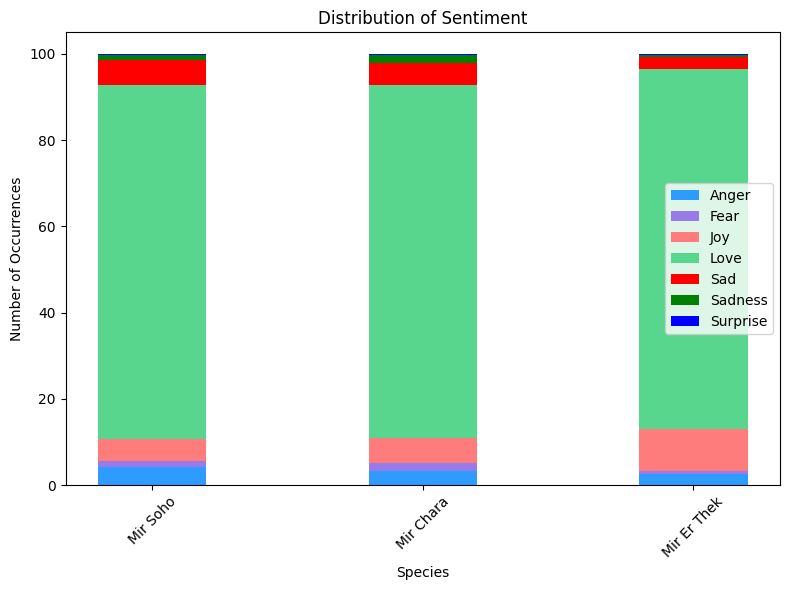

In [178]:
import matplotlib.pyplot as plt
import numpy as np

# Define custom colors for each sentiment type
colors = ['#2E9BFF', '#987BE9', '#FF7C7C', '#58D68D', 'red', 'green', 'blue']

species = (
    "Mir Soho",  
    "Mir Chara", 
    "Mir Er Thek",  
)
weight_counts = {
    "Anger": spm2.T[0],
    "Fear": spm2.T[1],
    'Joy':spm2.T[2],
    "Love": spm2.T[3],
    "Sad": spm2.T[4],
    "Sadness": spm2.T[5],
    "Surprise":spm2.T[6]
}

# Calculate the number of sentiment types
num_sentiments = len(weight_counts)

# Adjust width based on the number of sentiment types
width = 0.4

fig, ax = plt.subplots(figsize=(8, 6))

# Initialize bottom values with zeros for stacking
bottom = np.zeros(len(species))

# Stack the bars for each sentiment type with custom colors
for i, (sentiment, count) in enumerate(weight_counts.items()):
    plt.bar(species, count, width, label=sentiment, bottom=bottom, color=colors[i])
    bottom += count  # Update bottom for stacking

# Add labels and title
plt.xlabel("Species")
plt.ylabel("Number of Occurrences")
plt.title("Distribution of Sentiment")

# Adjust legend location
plt.legend(loc="best")

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Directly Apply on the DF

In [197]:
def finalv4(row, modelx):
    '''
    Implements our awsome algorithm and gives final output
    '''
    text = row['ctext']
    lang = row['language']
    
#     print(x)
    if lang == 'Bengali':
        tokenized_text = tokenizer(text,
                                    return_tensors="pt").to(device)

        with torch.no_grad():
            modelx = modelx.to(device)
            pred = modelx(**tokenized_text)
            logits = pred.logits
            probas = torch.nn.functional.softmax(logits, dim=1).to('cpu')
            predicted_class = torch.argmax(probas, dim=1).item()
    #         print(predicted_class)
    #         x.append(probas.numpy().flatten())
        return model.config.id2label[predicted_class]
    
    elif lang == 'English':
        try:
            return classifier_en(text)[0]['label']
        except:
            candidate_labels = ['love', 'sadness', 'fear', 'anger']
            return classifier(text, candidate_labels, multi_label=True)['labels'][0]
    else:
        candidate_labels = ['love', 'sadness', 'fear', 'anger']
        return classifier(text, candidate_labels, multi_label=True)['labels'][0]

In [199]:
demo = df1[:1000].copy()
demo.head(3)

,author,published_date,like_count,text,ctext,language
0,@wolfhowling220,2021-12-19,5373,"Sunday suspense er শ্রোতাদের মধ্যে কে কে ""The ...","Sunday suspense er শ্রোতাদের মধ্যে কে কে ""The ...",Bengali
1,@ksarkar1338,2021-12-03,4929,বেঁচে থাকতে হয়তো বিশ্ব সাহিত্যের যেসব গল্প কো...,বেঁচে থাকতে হয়তো বিশ্ব সাহিত্যের যেসব গল্প কো...,Bengali
2,@dcsalim4384,2021-12-12,4830,এ আমার পরম সৌভাগ্য যে একজন বাঙালি হয়ে জন্মেছি ...,এ আমার পরম সৌভাগ্য যে একজন বাঙালি হয়ে জন্মেছি ...,Bengali


In [202]:
tqdm.pandas()
demo['sentiment'] = demo.progress_apply(finalv4, args=(model,), axis=1)

  0%|          | 0/1000 [00:00<?, ?it/s]

/opt/conda/lib/python3.10/site-packages/transformers/pipelines/base.py:1157: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


In [204]:
demo.sentiment.value_counts()

sentiment
love        819
sad          59
joy          52
anger        41
fear         15
sadness      12
surprise      2
Name: count, dtype: int64

In [205]:
tqdm.pandas()
df3['sentiment'] = df3.progress_apply(finalv4, args=(model,), axis=1)

  0%|          | 0/99686 [00:00<?, ?it/s]

/opt/conda/lib/python3.10/site-packages/transformers/pipelines/base.py:1157: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


KeyboardInterrupt: 

## Ack
https://colab.research.google.com/drive/15h32YuSQ5YwVji8OynC9BvMaWGpsWyD2?usp=sharing#scrollTo=XGj0RdguKrDb
https://github.com/sagorbrur/bnlp/blob/main/docs/README.md#bengali-corpus-class